First Notebook

In [3]:
import pandas
from matplotlib import pyplot as plt
import numpy as np

In [4]:
def parseArray(array):
    parsedArray = array[1:-1].replace('\n','').replace(' ','').split(',')
    parsedArray = filter(None,parsedArray)
    return np.array(list(parsedArray)).astype(float)

def filterByDate(date):
    return samples.query('expirement_date == %s' % date)

def filterByPeaks(filteredSamples):
    pandas.options.mode.chained_assignment = None
    
    # -1 -> error with radial profile
    # -2 -> no peaks
    # -3 -> error with peaks
    # -4 -> many peaks
    
    size = filteredSamples.shape[0]
    
    a = filteredSamples.query('peaks == "-1"')['peaks'].shape[0]
    b = filteredSamples.query('peaks == "-2"')['peaks'].shape[0]
    c = filteredSamples.query('peaks == "-3"')['peaks'].shape[0]
    
    newSamples = filteredSamples.query('peaks != "-1" and peaks != "-2" and peaks != "-3"')
    
    newSamples.peaks = newSamples['peaks'].apply(lambda x: parseArray(x)[0])
#     .apply(lambda x: "-4" if len(x)>1 else x[0])
    
#     d = newSamples.query('peaks == "-4"')['peaks'].shape[0]
    
#     newSamples = newSamples.query('peaks != "-4"')
    newSize = newSamples.shape[0]
    return (newSamples, size, a, b, c, newSize)
#     return (newSamples, size, a, b, c, d, newSize)

def plotField(filteredSamples,plot,field1,field2):
    plot.scatter(x=filteredSamples[field1],y=filteredSamples[field2])
    plot.set_title(field1 + ' by ' + field2)
    plot.set_xlabel(field1)
    plot.set_ylabel(field2)

In [6]:
samples = pandas.read_csv('peak_distances_2.csv')

fields = ['time','num_seg_pxls','stack_data_mean','image_intensity_mean','peaks']
dates = np.unique(samples['expirement_date'].to_numpy())

In [7]:
def plotAllForDate(date,col):
    fig, plots = plt.subplots(nrows=int(gauss(len(fields)-1)/col),ncols=col)

    fig.suptitle('date: %s' % date)
    
    fig.set_figheight(15*2)
    fig.set_figwidth(15*col)
    
    
    filteredSamples = filterByDate(date)
    a = filterByPeaks(filteredSamples)
    filteredSamples = a[0]
    
#     print(a[1:])

    i = 0
    for a in range(len(fields)):
        for b in range(a):
            plotField(filteredSamples,plots[int(i/col)][i%col],fields[a],fields[b])
            i+=1
    
    plt.tight_layout()
    fig.patch.set_facecolor('xkcd:white')
    fig.savefig('%s.png' % (directory+'Scatter Data/'+str(date)))

([<matplotlib.axis.XTick at 0x1e767b34d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

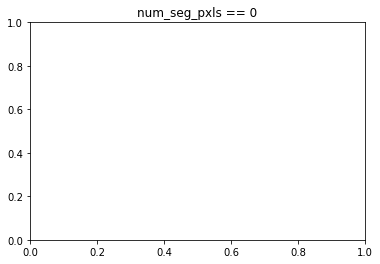

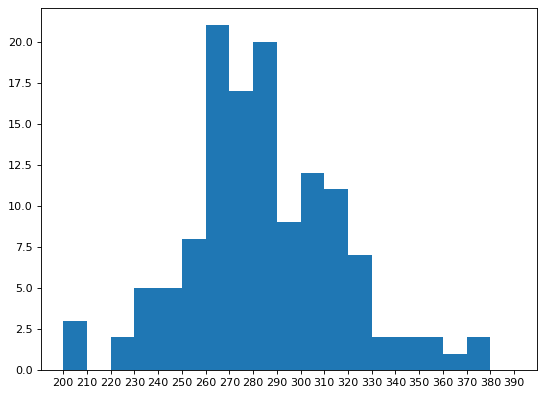

In [26]:
# a = filterByDate(dates[1])
b = filterByPeaks(samples)
c = b[0].query('num_seg_pxls == 0')['peaks']
bins = range(200,400,10)
plt.figure(figsize=(8, 6), dpi=80)
plt.title('num_seg_pxls == 0')
plt.hist(c,bins=bins)
plt.xticks(bins)